In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('C:/Users/user/Downloads/Online Retail.xlsx', sheet_name = 'Online Retail')

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.shape

(541909, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
df = df.dropna(subset=['CustomerID'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [9]:
import datetime as dt 

In [10]:
def get_month(x):
    return dt.datetime(x.year, x.month,1)

In [12]:
df['InvoiceMonth']= df['InvoiceDate'].apply(get_month)

In [13]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01


In [14]:
#create a column index with min invoice date aka first time customer was acquired
df['CohertMonth'] = df.groupby('CustomerID')['InvoiceMonth'].transform('min')

In [16]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohertMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01


In [19]:
#create a date element function to get a series for substraction
def get_date_element(data, column):
    day = data[column].dt.day
    month = data[column].dt.month
    year = data[column].dt.year
    return day, month, year

In [24]:
#get date elements for our cohort and invoice columns
_, InvoiceMonth, InvoiceYear = get_date_element(df,'InvoiceMonth')
_, CohortMonth, CohortYear = get_date_element(df,'CohertMonth')

In [23]:
InvoiceYear[:10]

0    2010
1    2010
2    2010
3    2010
4    2010
5    2010
6    2010
7    2010
8    2010
9    2010
Name: CohertMonth, dtype: int64

In [25]:
CohortMonth[:10]

0    12
1    12
2    12
3    12
4    12
5    12
6    12
7    12
8    12
9    12
Name: CohertMonth, dtype: int64

In [26]:
#create an cohort index (it show when the user was acquired)
year_diff = InvoiceYear-CohortYear
month_diff= InvoiceMonth-CohortMonth


In [27]:
df['CohortIndex']= year_diff*12+month_diff +1

In [34]:
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohertMonth,CohortIndex
115501,C546128,22726,ALARM CLOCK BAKELIKE GREEN,-1,2011-03-09 15:05:00,3.75,15622.0,United Kingdom,2011-03-01,2011-03-01,1
414932,572499,23557,LANDMARK FRAME BAKER STREET,3,2011-10-24 14:10:00,12.50,15786.0,United Kingdom,2011-10-01,2011-08-01,3
329886,565857,21174,POTTERING IN THE SHED METAL SIGN,12,2011-09-07 14:13:00,2.08,14911.0,EIRE,2011-09-01,2010-12-01,10
188189,553015,22109,FULL ENGLISH BREAKFAST PLATE,1,2011-05-12 18:55:00,3.75,12748.0,United Kingdom,2011-05-01,2010-12-01,6
214037,C555563,23146,TRIPLE HOOK ANTIQUE IVORY ROSE,-1,2011-06-05 14:48:00,3.29,17841.0,United Kingdom,2011-06-01,2010-12-01,7


In [42]:
#count th customerId by grouping by corhort month and cohort index
cohort_data = df.groupby(['CohertMonth', 'CohortIndex'])['CustomerID'].apply(pd.Series.nunique).reset_index()
cohort_data

,CohertMonth,CohortIndex,CustomerID
0,2010-12-01,1,948
1,2010-12-01,2,362
2,2010-12-01,3,317
3,2010-12-01,4,367
4,2010-12-01,5,341
...,...,...,...
86,2011-10-01,2,93
87,2011-10-01,3,46
88,2011-11-01,1,321
89,2011-11-01,2,43


In [43]:
df.groupby(['CohertMonth', 'CohortIndex'])['CustomerID'].nunique().reset_index()

,CohertMonth,CohortIndex,CustomerID
0,2010-12-01,1,948
1,2010-12-01,2,362
2,2010-12-01,3,317
3,2010-12-01,4,367
4,2010-12-01,5,341
...,...,...,...
86,2011-10-01,2,93
87,2011-10-01,3,46
88,2011-11-01,1,321
89,2011-11-01,2,43


In [45]:
cohort_table = cohort_data.pivot(index= 'CohertMonth', columns=['CohortIndex'], values ='CustomerID')

In [46]:
cohort_table

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohertMonth,,,,,,,,,,,,,
2010-12-01,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04-01,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05-01,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='CohortIndex', ylabel='CohertMonth'>

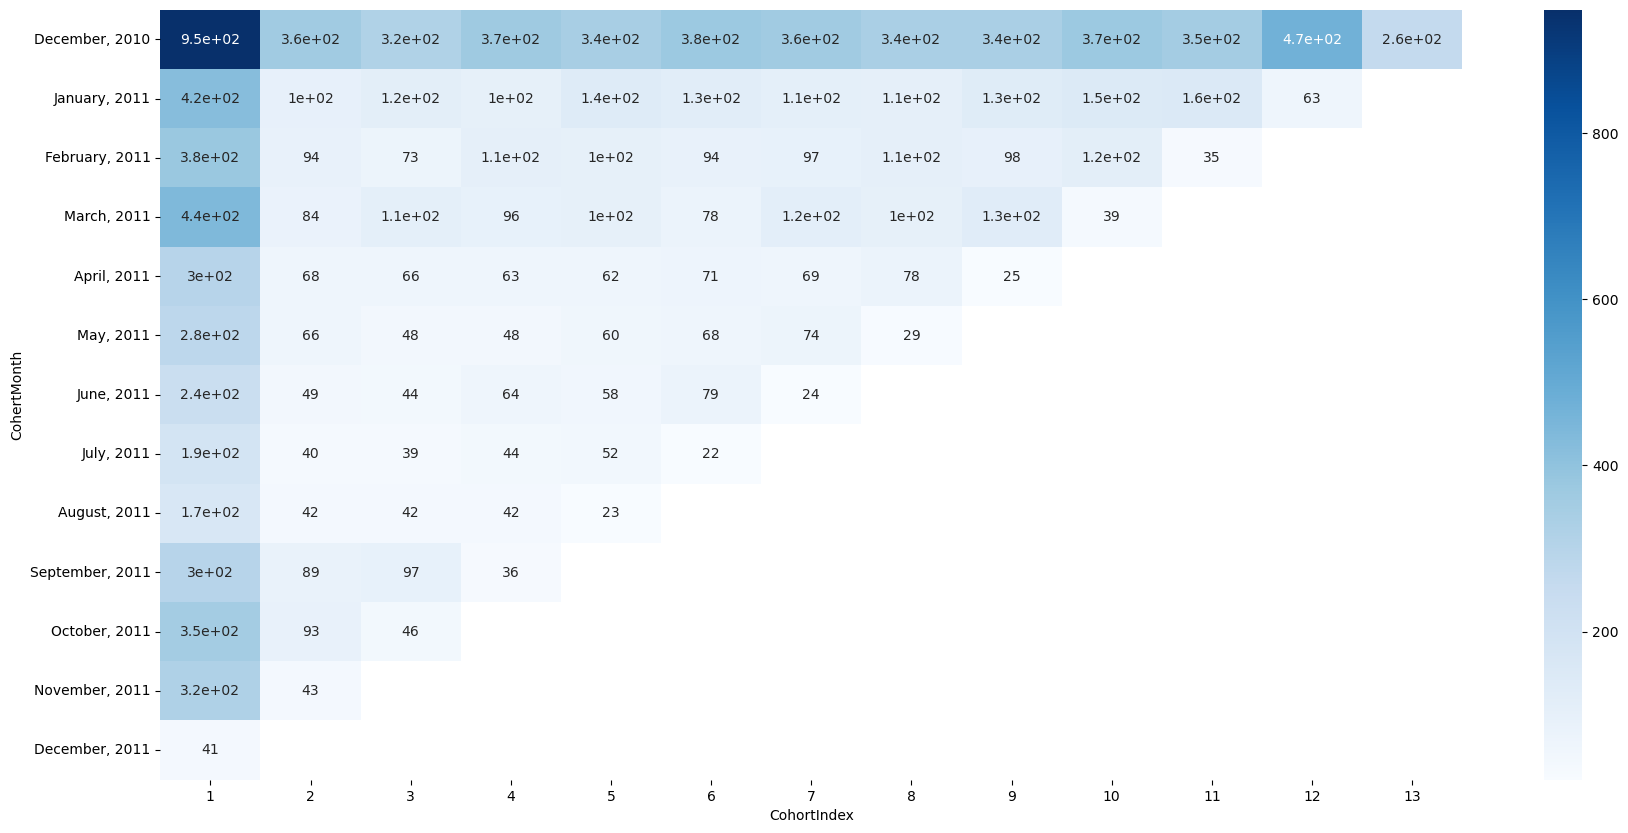

In [55]:
#ohort_table.index = cohort_table.index.strftime('%B, %Y')
plt.figure(figsize = (21,10))
sns.heatmap(cohort_table, annot=True, cmap="Blues")

In [57]:
new_cohort_table = cohort_table.divide(cohort_table.iloc[:,0], axis=0)

In [58]:
new_cohort_table

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohertMonth,,,,,,,,,,,,,
"December, 2010",1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
"January, 2011",1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
"February, 2011",1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
"March, 2011",1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
"April, 2011",1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
"May, 2011",1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
"June, 2011",1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
"July, 2011",1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"August, 2011",1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='CohortIndex', ylabel='CohertMonth'>

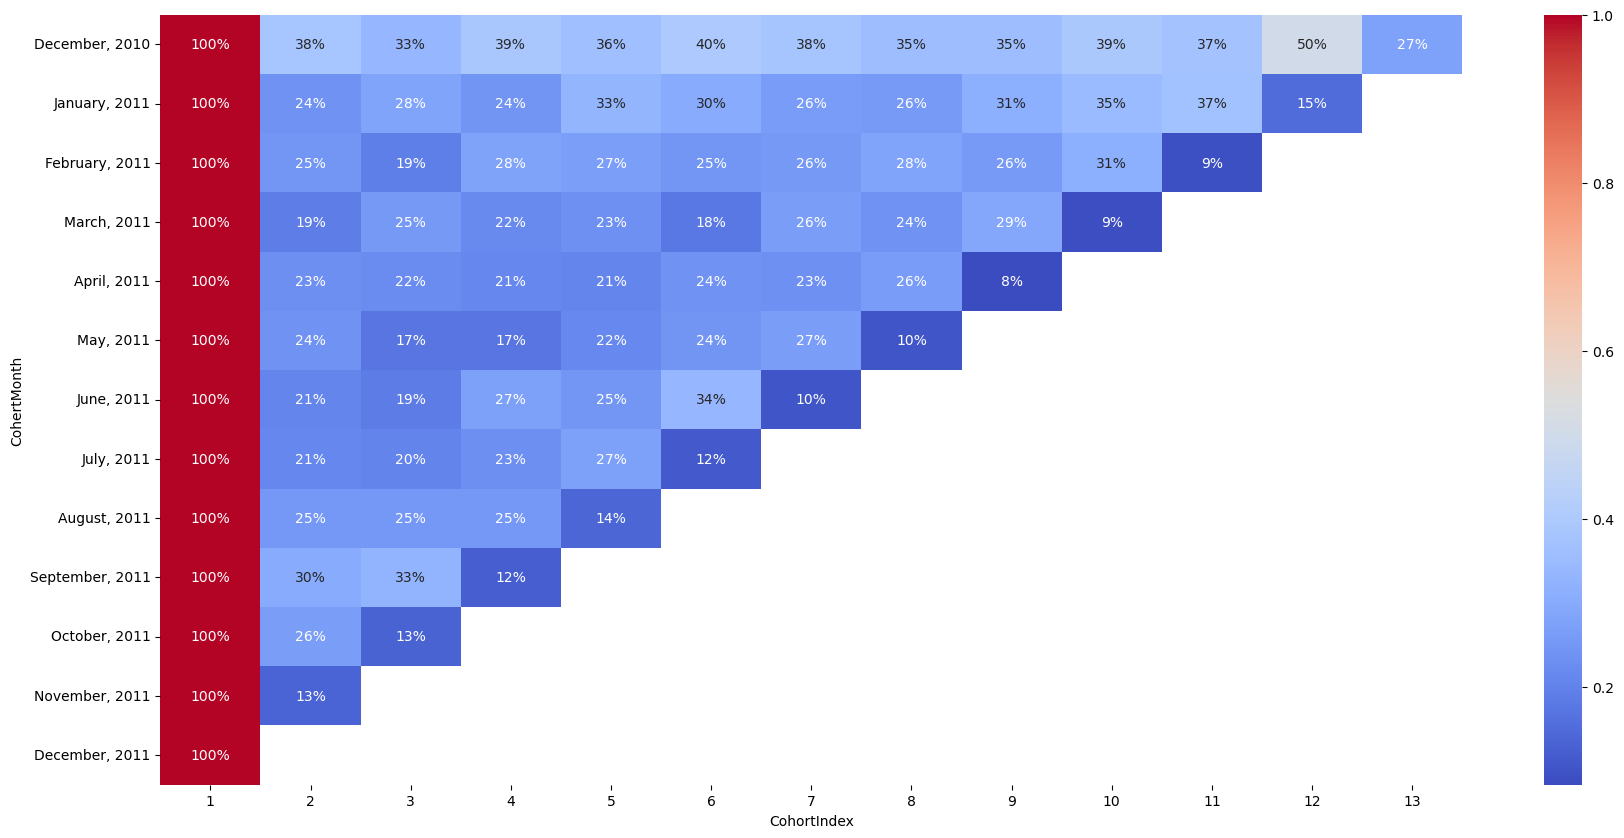

In [62]:
plt.figure(figsize = (21,10))
sns.heatmap(new_cohort_table, annot=True, cmap="coolwarm", fmt='.0%')

<Axes: xlabel='CohortIndex', ylabel='CohertMonth'>

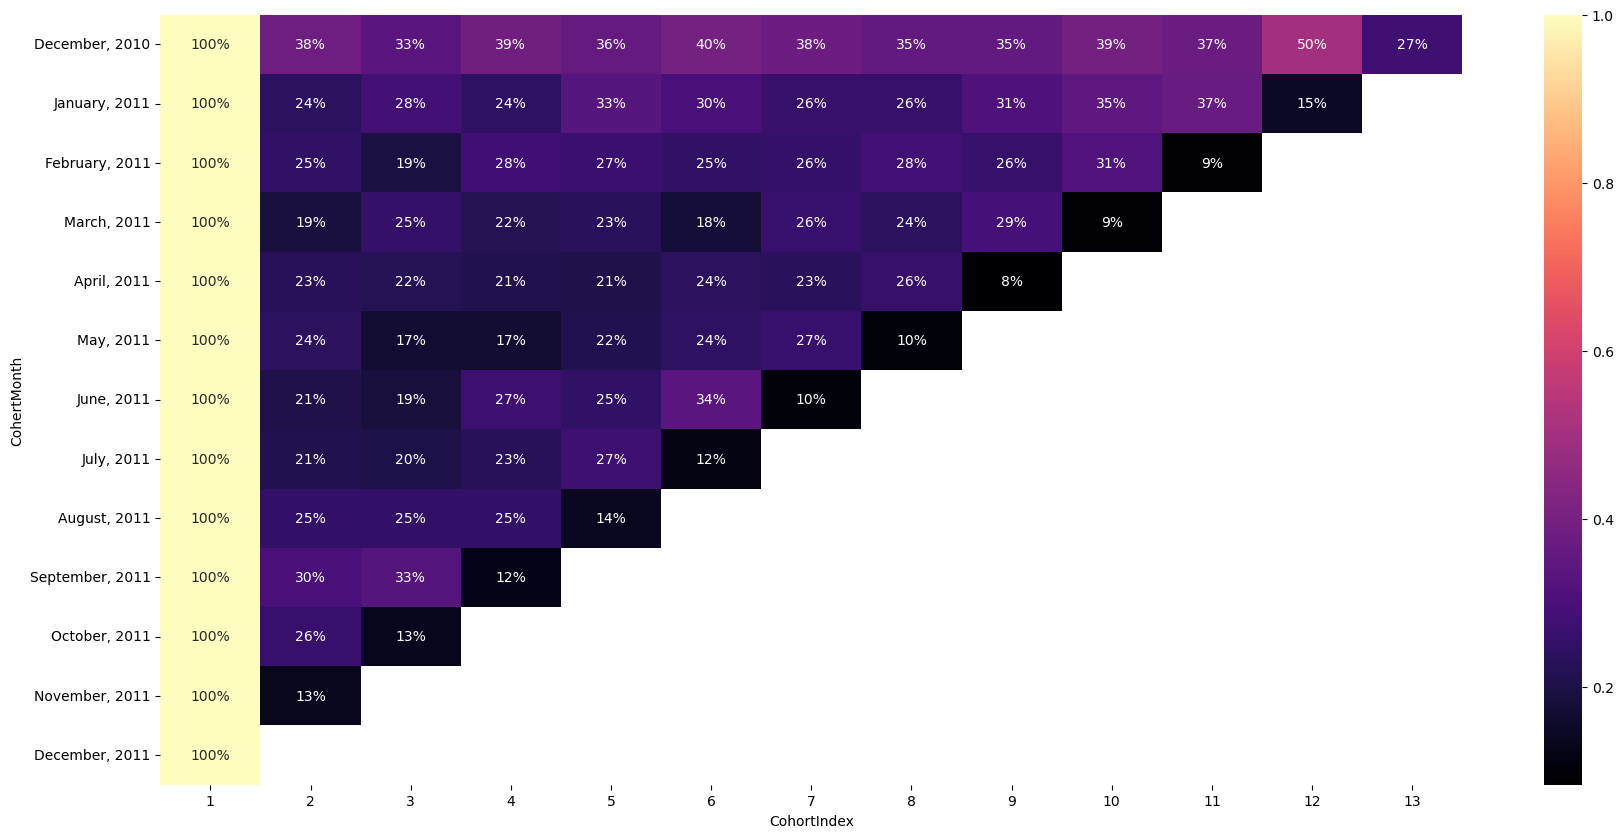

In [63]:
plt.figure(figsize = (21,10))
sns.heatmap(new_cohort_table, annot=True, cmap="magma", fmt='.0%')